Plotting the demand curves we get from LMP and load data points for 31 Aug 2022

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [117]:
df = pd.read_csv('Example11_9_Network_Model_24hour - LoadProfiles.csv')
df.head()

,Date,HE,Load2,Load3,Load4,Load5,Price2,Price3,Price4,Price5
0,8/31/2040,1,171.510922,179.456955,35.198532,0.928873,116.93256,118.97675,121.02094,115.79821
1,8/31/2040,2,166.661560,173.609062,35.030356,0.873289,105.56723,106.82196,108.67215,104.05731
2,8/31/2040,3,166.863143,168.851962,33.779206,0.843862,105.77841,106.44000,108.14506,103.17422
3,8/31/2040,4,167.527457,168.298959,32.144082,0.837749,101.53130,101.85271,103.34300,99.13791
4,8/31/2040,5,168.272660,172.979293,33.289749,0.873147,102.00335,102.06857,103.61817,99.30600


Assume some constant elasticity, and calculate K based on load-price data for each time step.

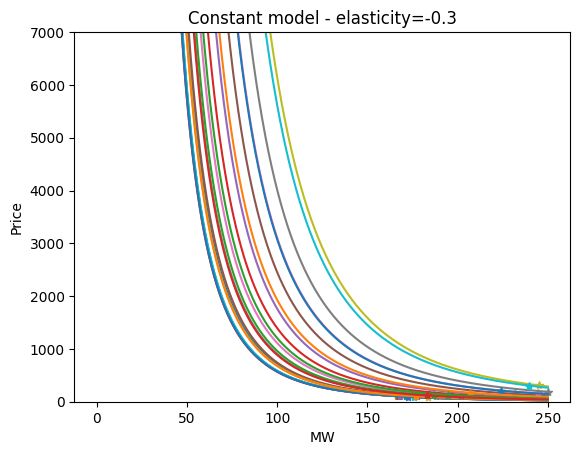

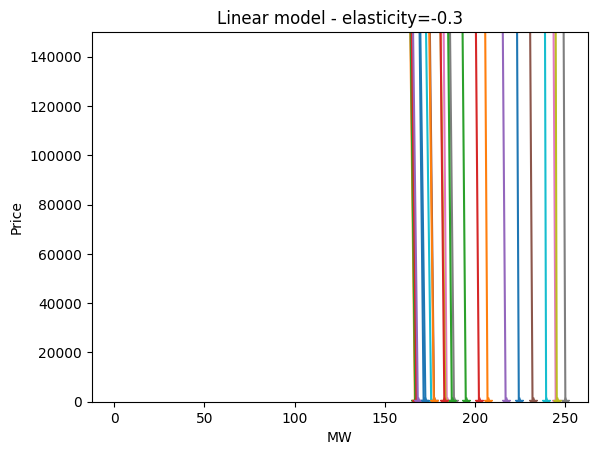

In [118]:
# Assume constant e and recalculate K for each time step
P = np.linspace(0.1,max(df['Load2']),1000) # Define quantity vector
ei = -0.3 # Choose elasticity

fig, ax = plt.subplots()
c = sns.color_palette(n_colors=len(df))
i = 0
for t in range(len(df)):
    # Get nominal values from DF
    P_hat = df['Load2'].iloc[t]
    l_hat = df['Price2'].iloc[t]
    ax.plot(P_hat,l_hat,'*', color=c[i]) # plot this nominal value
    
    # Constant model
    K = l_hat/(P_hat**(1/ei)) # Choose K s.t. du(P_hat) = l_hat
    du = K*(P**(1/ei))
    ax.plot(P, du, label=ei, color=c[i]) # plot demand curve 
    i += 1

ax.set_xlabel('MW')
ax.set_ylabel('Price')
ax.set_title('Constant model - elasticity=' + str(ei))
ax.set_ylim([0,7000])
plt.show()

# Linear model
fig, ax = plt.subplots()

i = 0
for t in range(len(df)):
    # Get nominal values from DF
    P_hat = df['Load2'].iloc[t]
    l_hat = df['Price2'].iloc[t]
    ax.plot(P_hat,l_hat,'*', color=c[i])
    # Linear model
    du = l_hat + (l_hat/ei*P_hat)*(P-P_hat)
    ax.plot(P, du, color=c[i])
    i += 1

ax.set_xlabel('MW')
ax.set_ylabel('Price')
ax.set_title('Linear model - elasticity=' + str(ei))
ax.set_ylim([0,150000])
plt.show()